# DATA VISUALIZATION / VALIDATION

In this notebook, we will visualize all the available data. In particular, all the data data will be used for sure in the project, but more data such as the ERA5 sea-level-pressure fields can be loaded and visualized, so please refer to the `sscode/` folder for more information. Again, all the functions/classes used in the notebooks are hosted and documented in the repository, so please refer to the code in case any doubt exists!!

In [1]:
# common
import os, sys

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# data viewer
from sscode.data import Loader
from sscode.data import load_moana_hindcast, load_cfsr, \
    join_load_uhslc_tgs, load_moana_hindcast_ss
from sscode.plotting.data import plot_all_data

# warnings
import warnings
warnings.filterwarnings('ignore')

## Plot all available data


 loading the Moana v2 hindcast data... 


 loading the Moana v2 hindcast data (ss)... 


 loading and plotting the UHSLC tidal guages... 


 loading the sea-level-pressure fields... 

 cropping the data to 2003 


 projected winds will not be calculated... returning the SLP... 



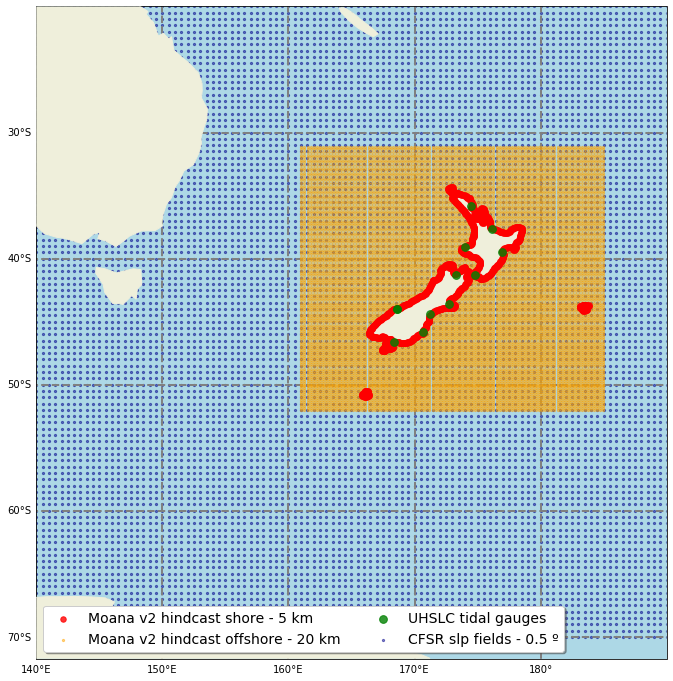

In [2]:
# we first plot all the data that will be used in the notebooks
plot_all_data(
    moana_hind=load_moana_hindcast(),
    moana_hind_all=load_moana_hindcast_ss(),
    uhslc_tgs=join_load_uhslc_tgs(),
    pres_cfsr=load_cfsr(time='2003')[0]
)

## Load and validate the data


 loading the sea-level-pressure fields... 


 loading daily resampled data... 



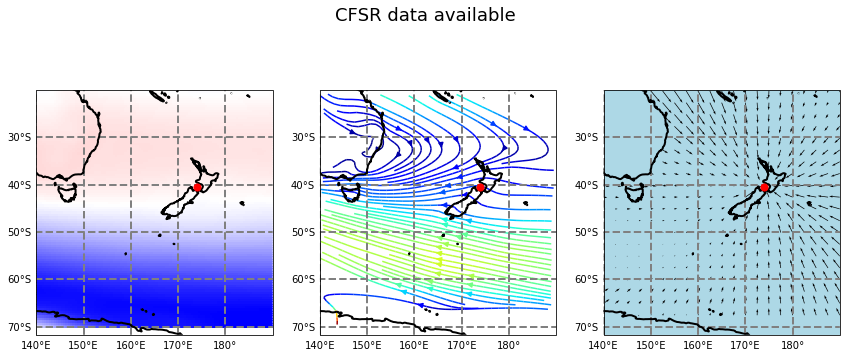


 loading the Moana v2 hindcast data... 



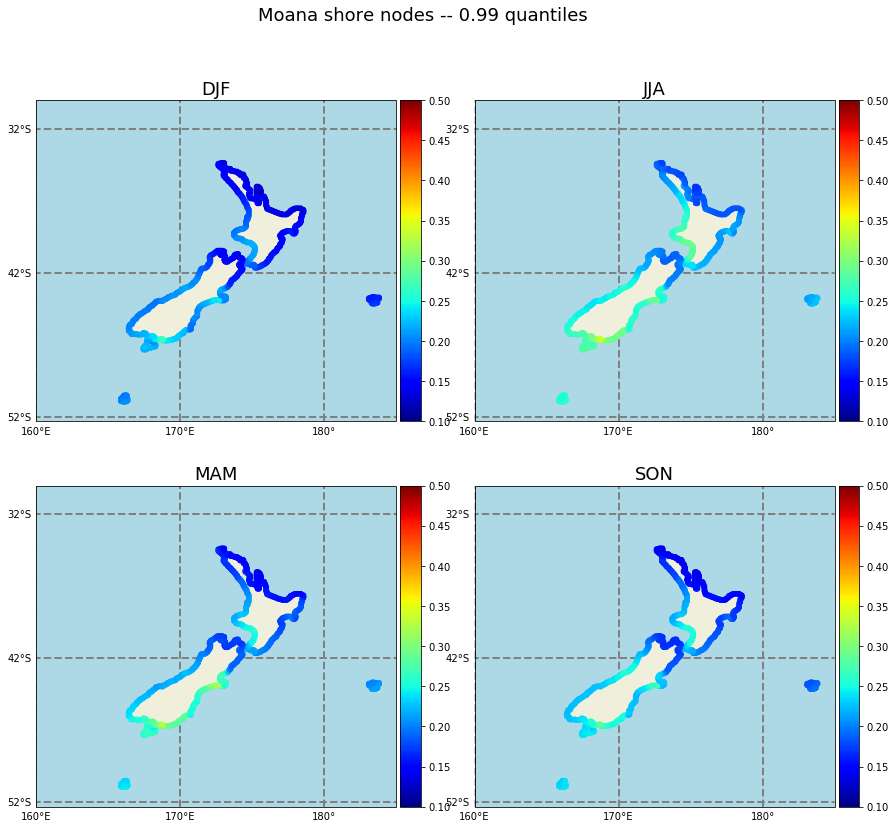


 loading and plotting the UHSLC tidal guages... 



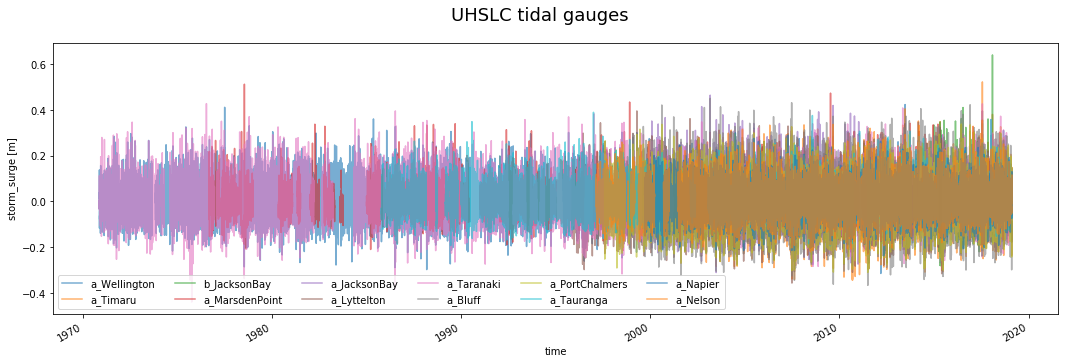

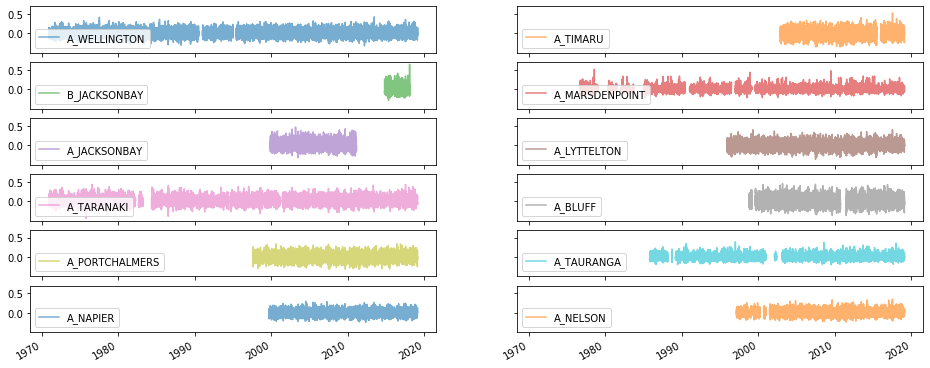

In [3]:
# load the data using the Loader class
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc']
)


 Lets compare data in Moana v2 hindcast with UHSLC tgs!! 


 
 TGs to analyze are: 
 ['a_Wellington' 'a_Timaru' 'b_JacksonBay' 'a_MarsdenPoint' 'a_JacksonBay'
 'a_Lyttelton' 'a_Taranaki' 'a_Bluff' 'a_PortChalmers' 'a_Tauranga'
 'a_Napier' 'a_Nelson'] 


 which correspond to 
 [689, 328, 393, 1327, 393, 480, 999, 116, 224, 1124, 949, 708] 
 in Moana v2 hindcast 


 calculated min distances (km) in Moana v2 hindcast to UHSLC tgs: 
 [10.091858550595918, 5.125532152668501, 6.8976210810727725, 7.807937095794991, 6.8976210810727725, 8.749086655427975, 0.7284939428835768, 2.827544577707935, 8.837335750916106, 4.69880874581877, 1.8441234559361168, 4.255617965386278] 



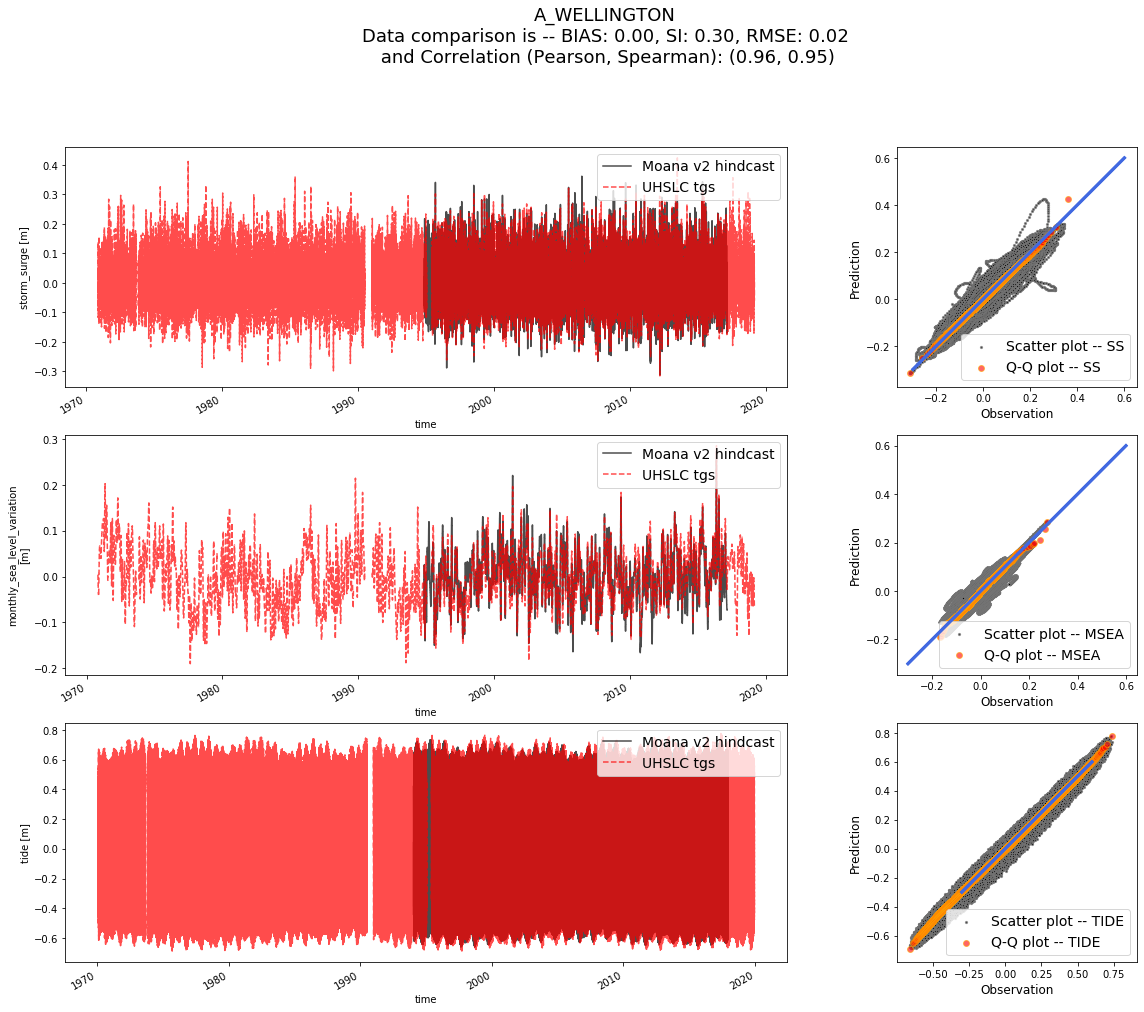

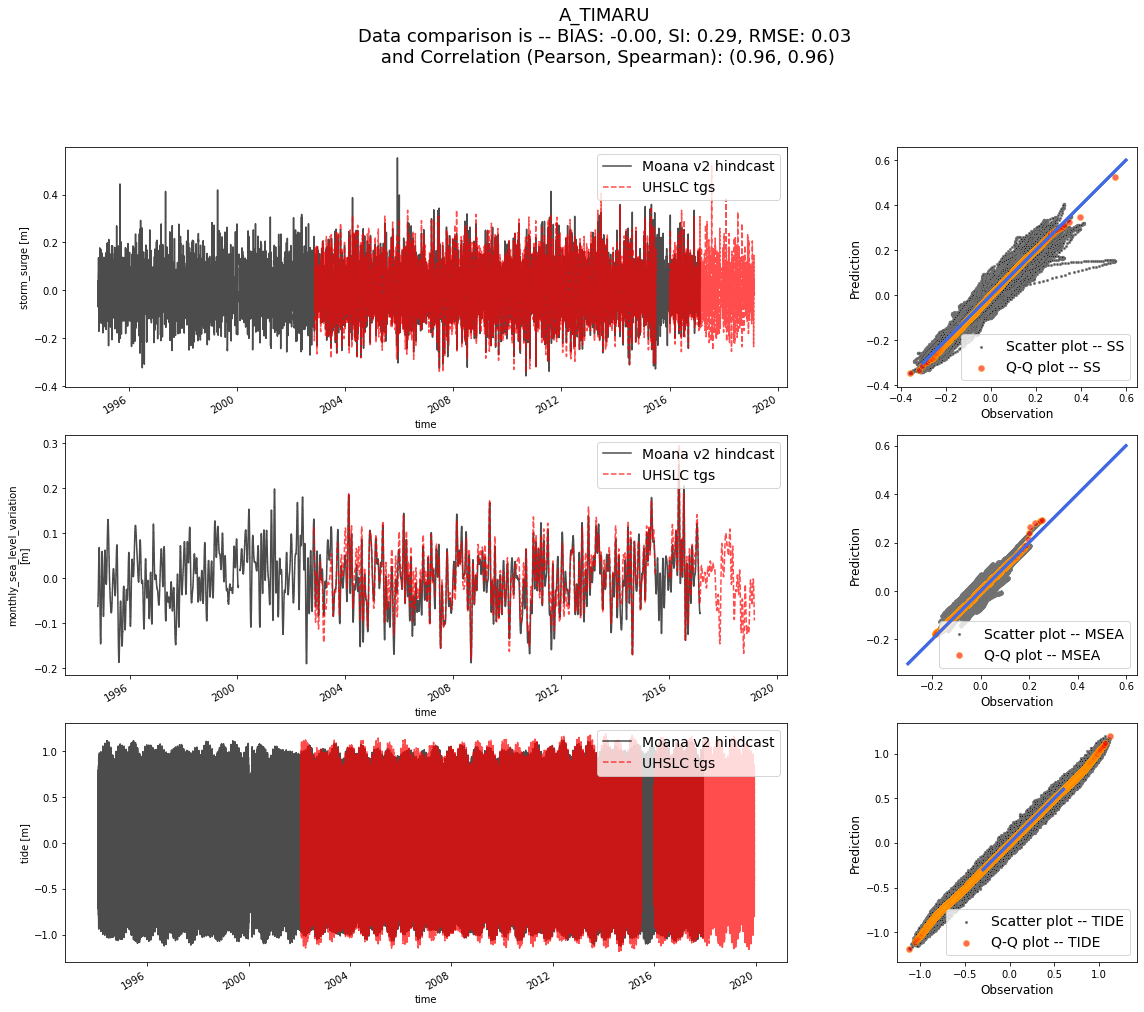

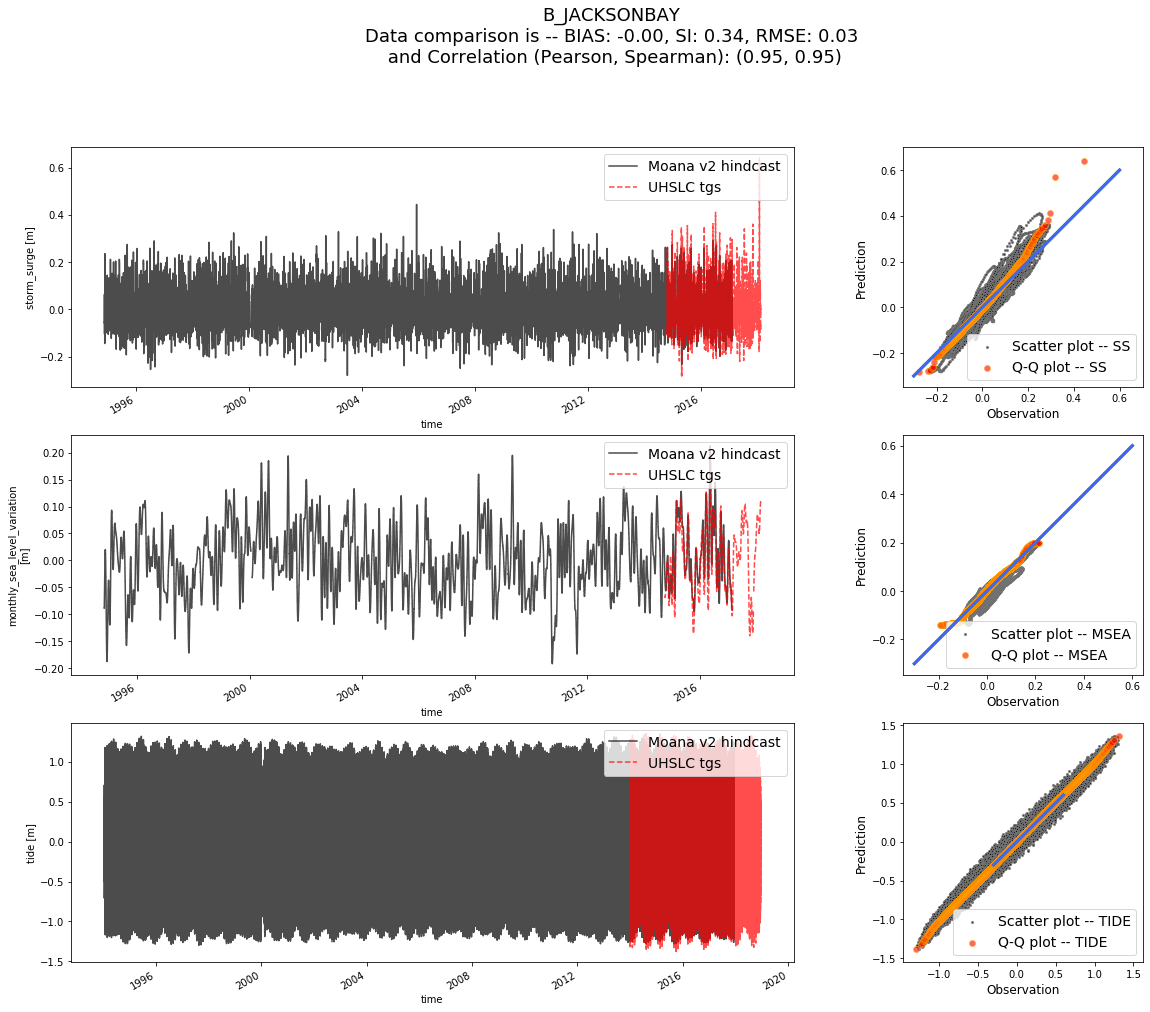

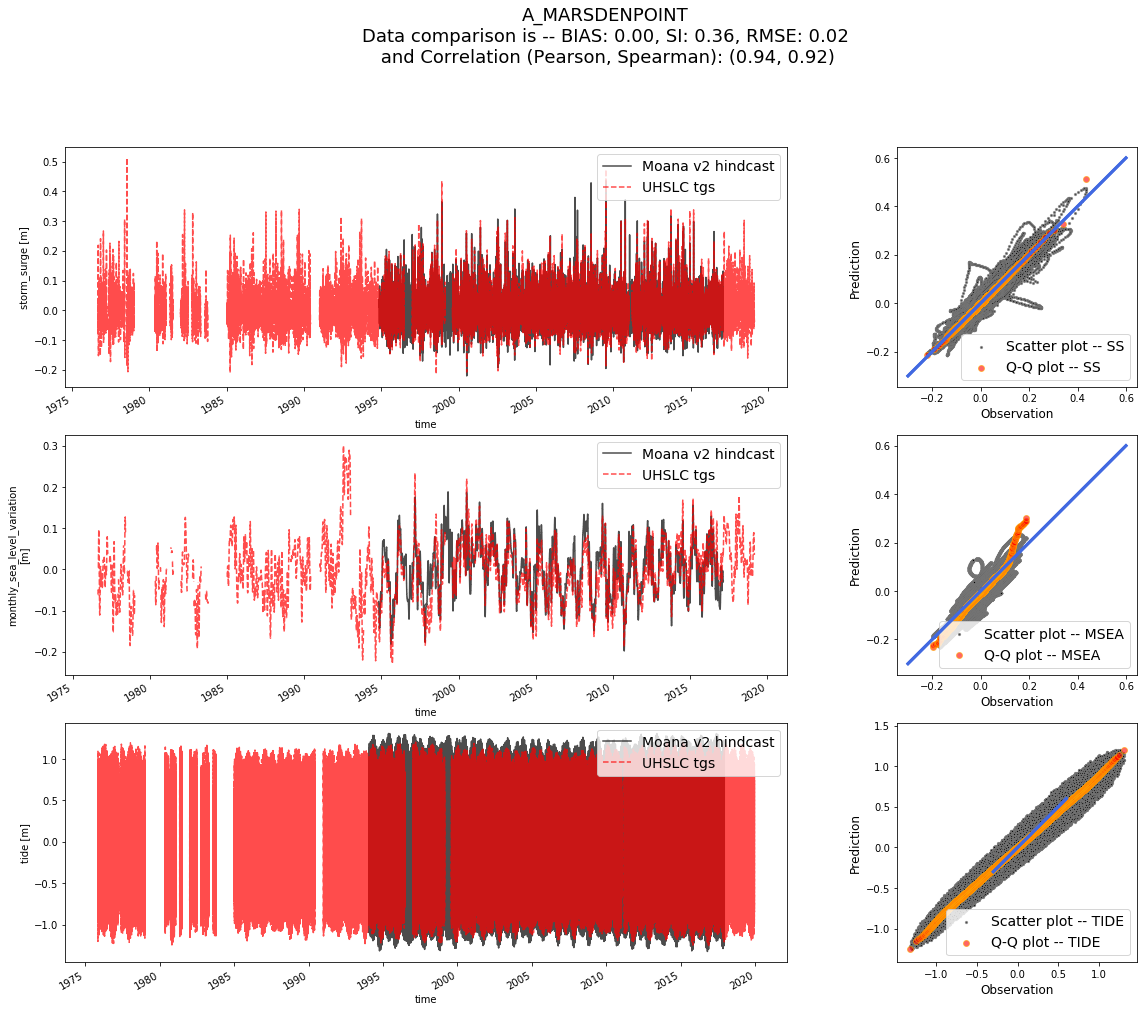

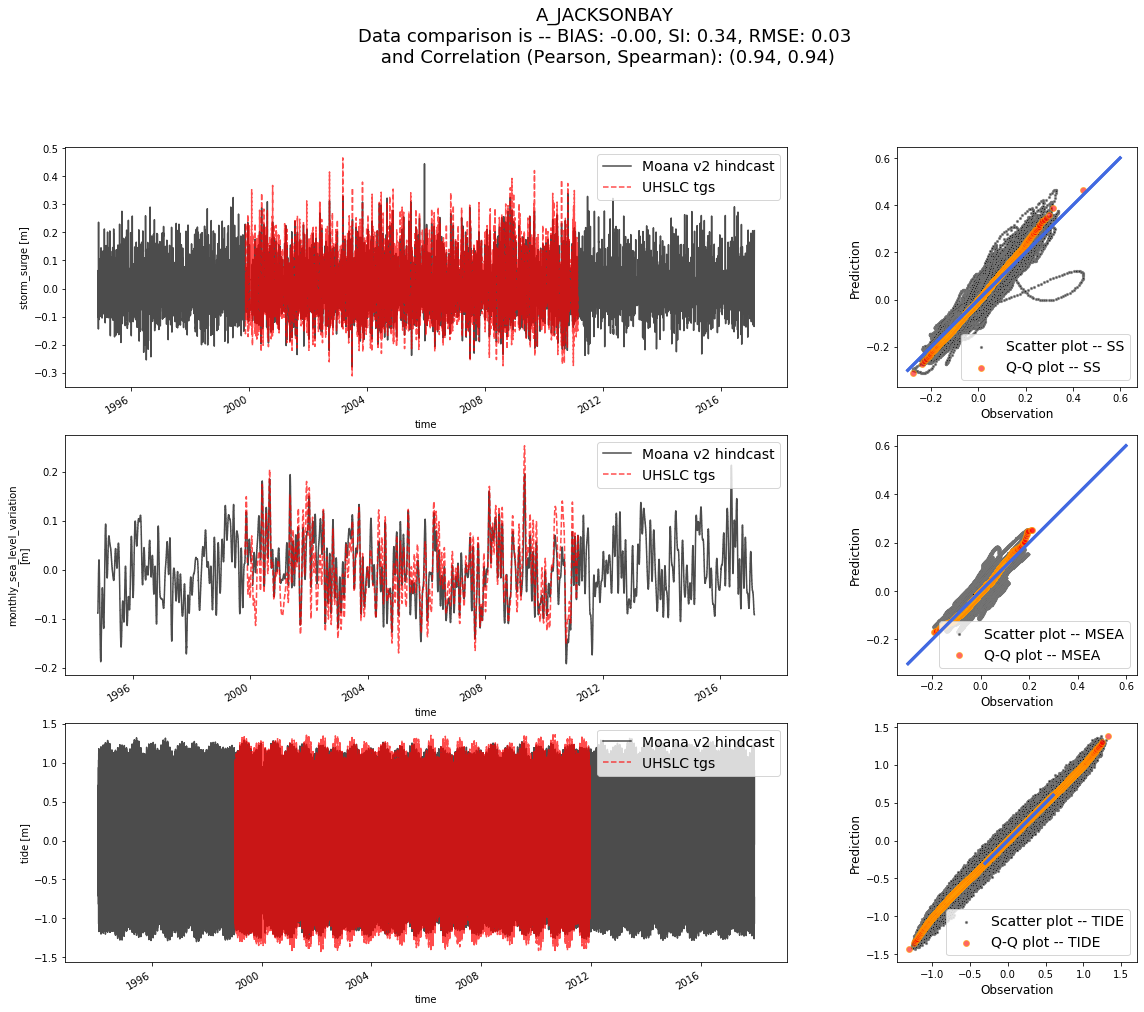

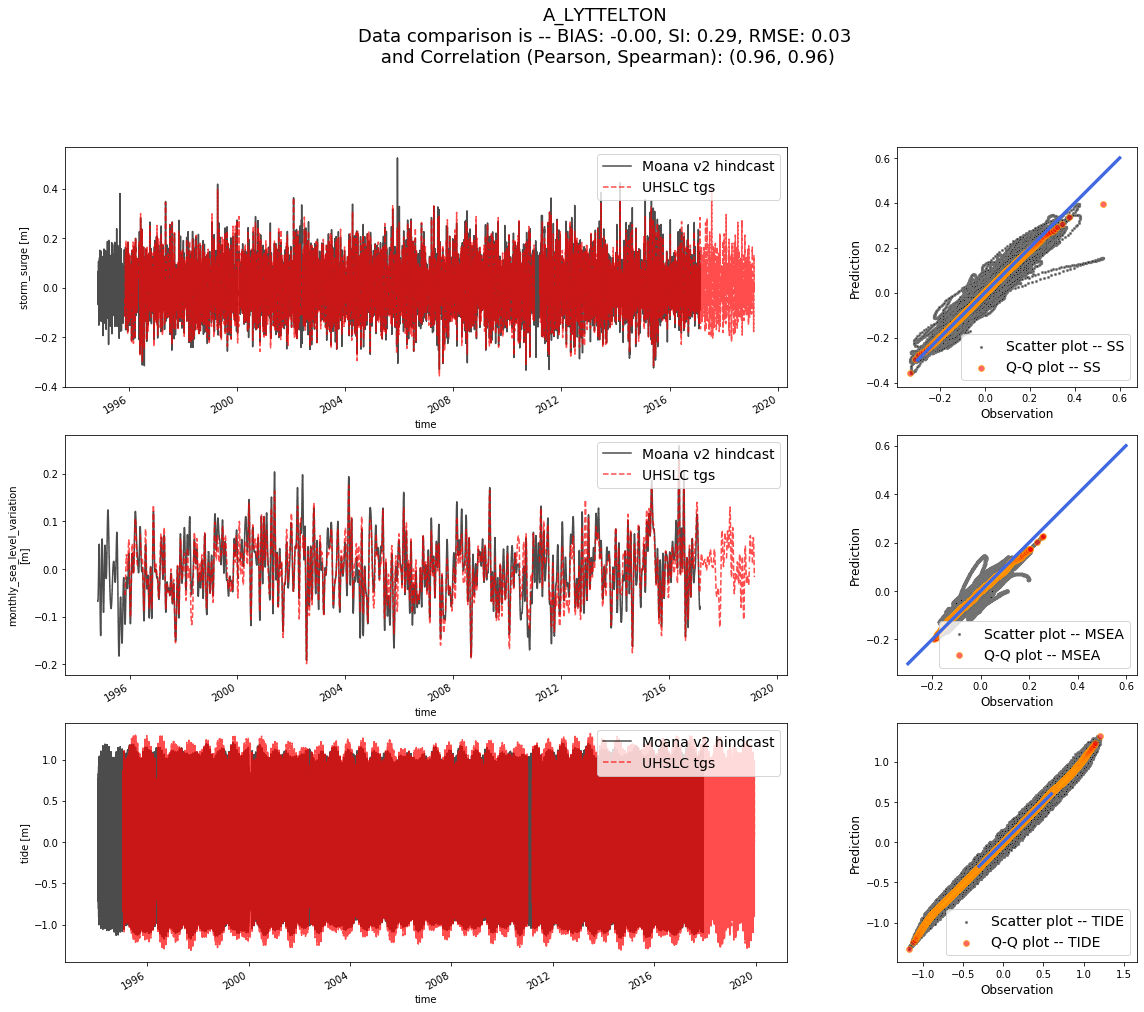

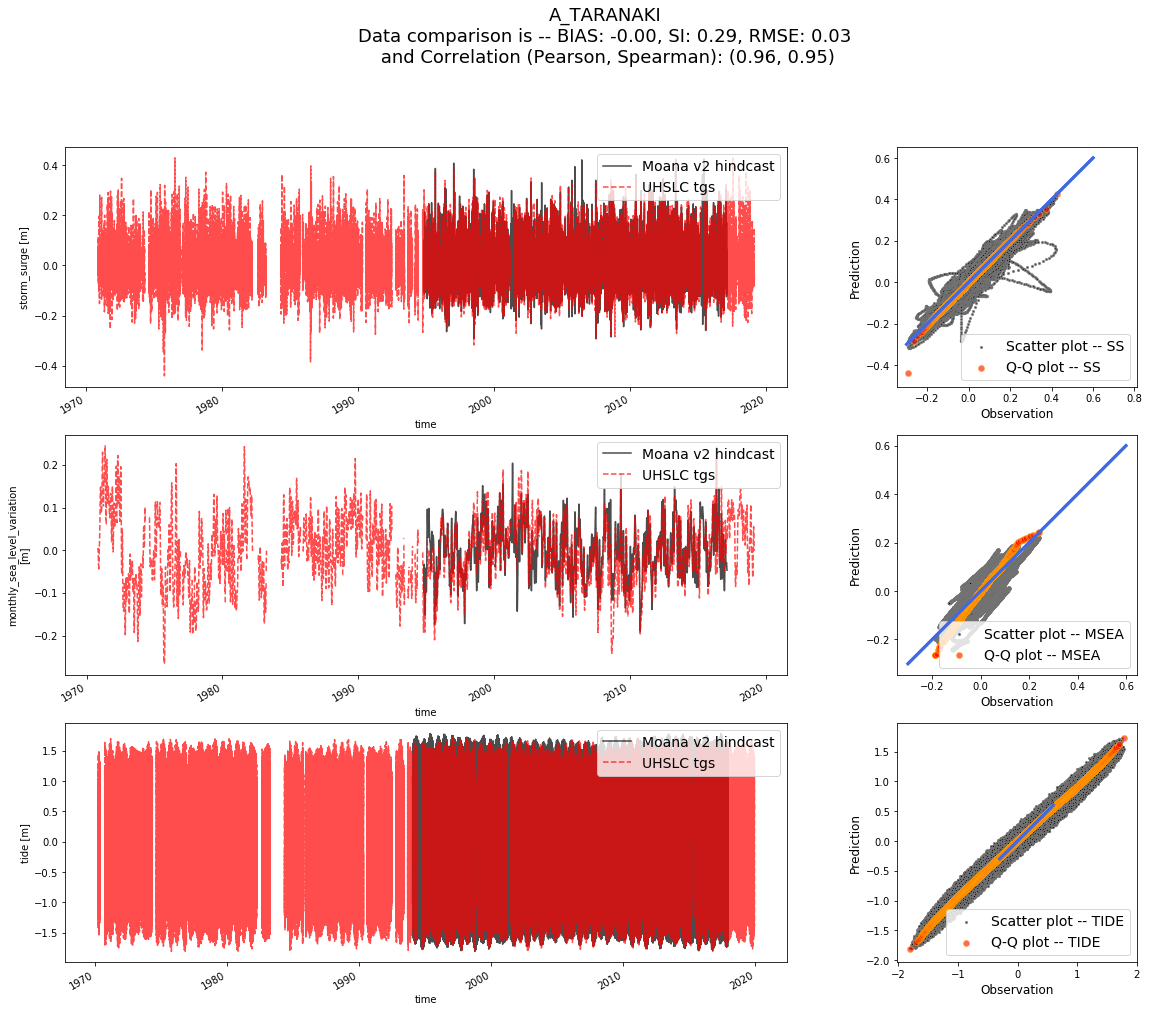

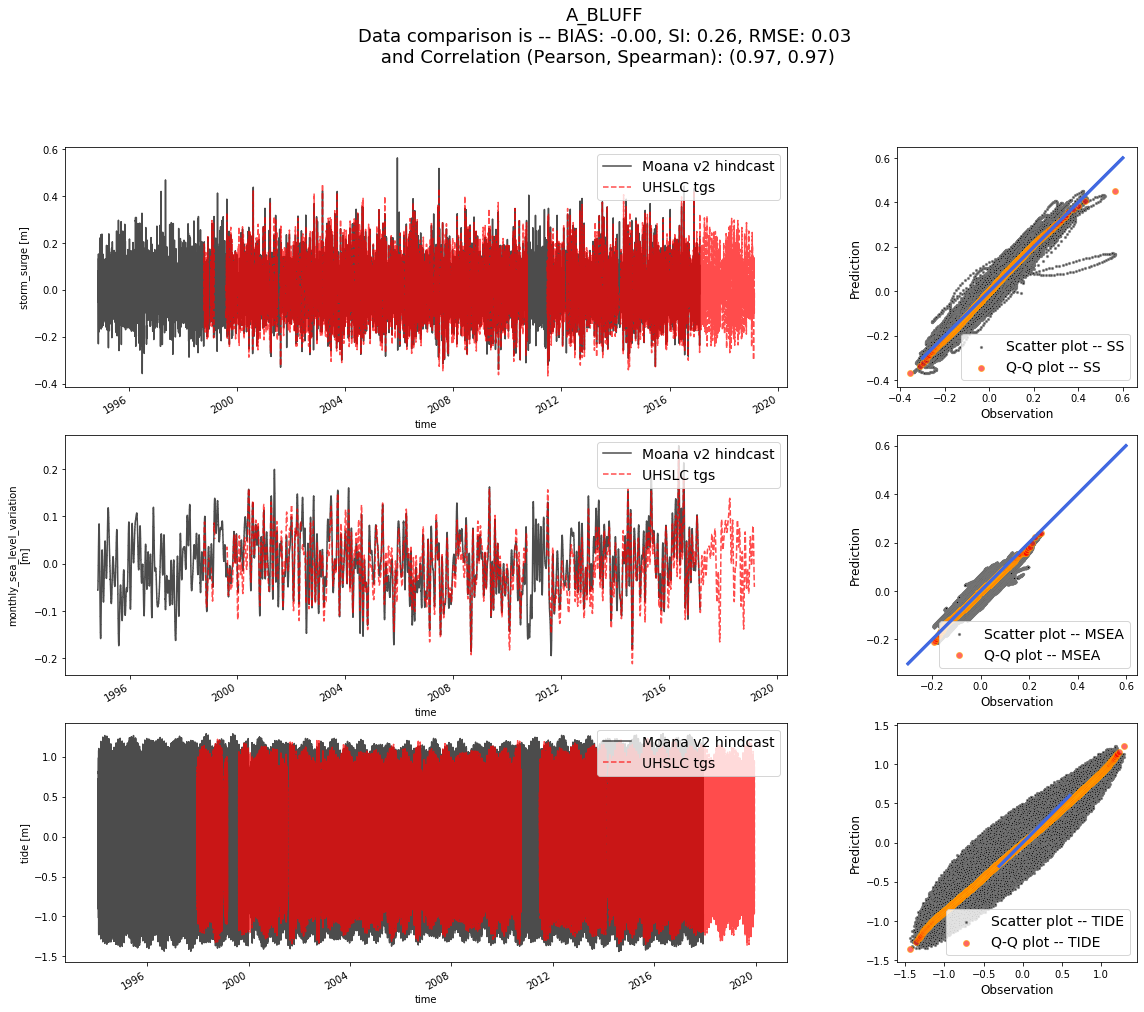

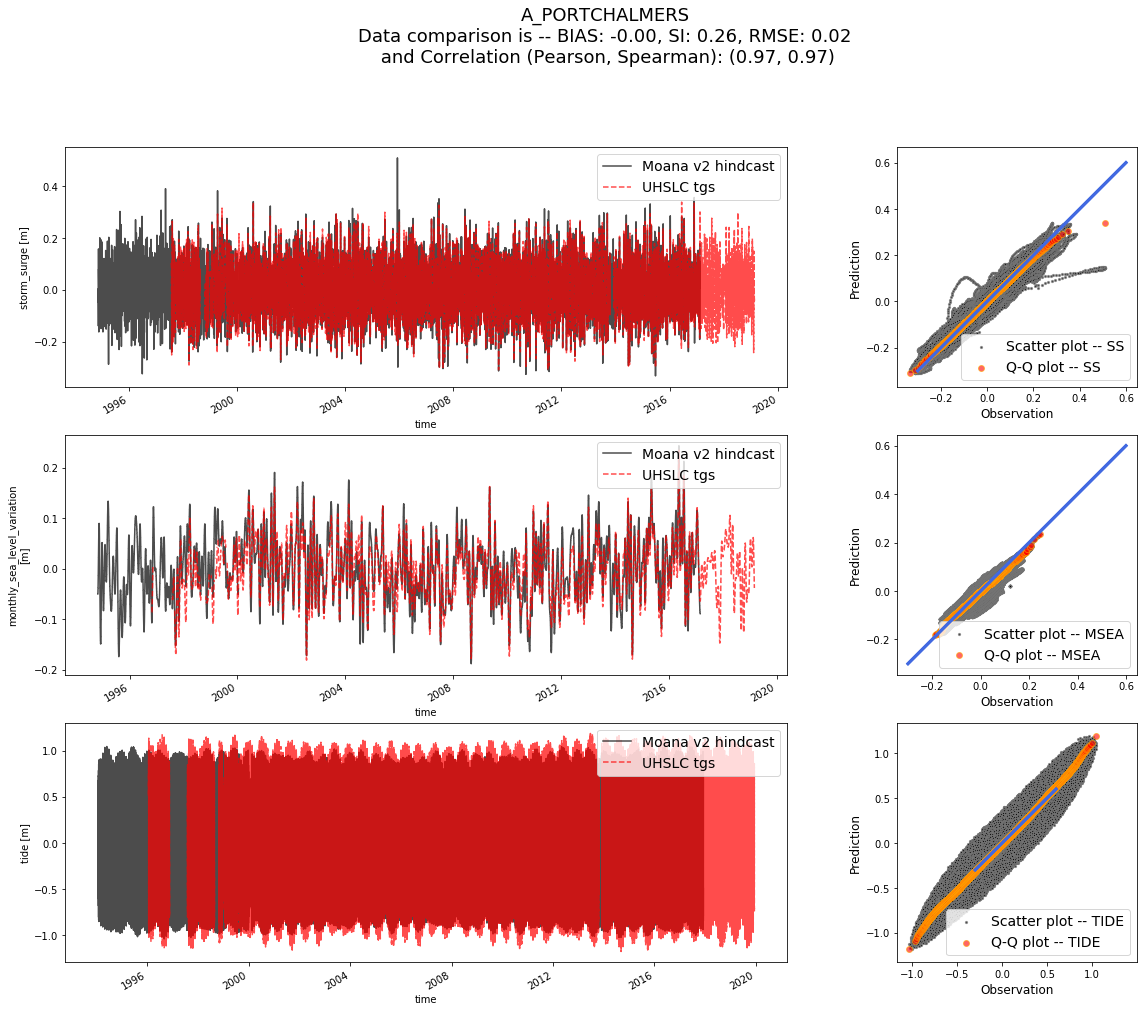

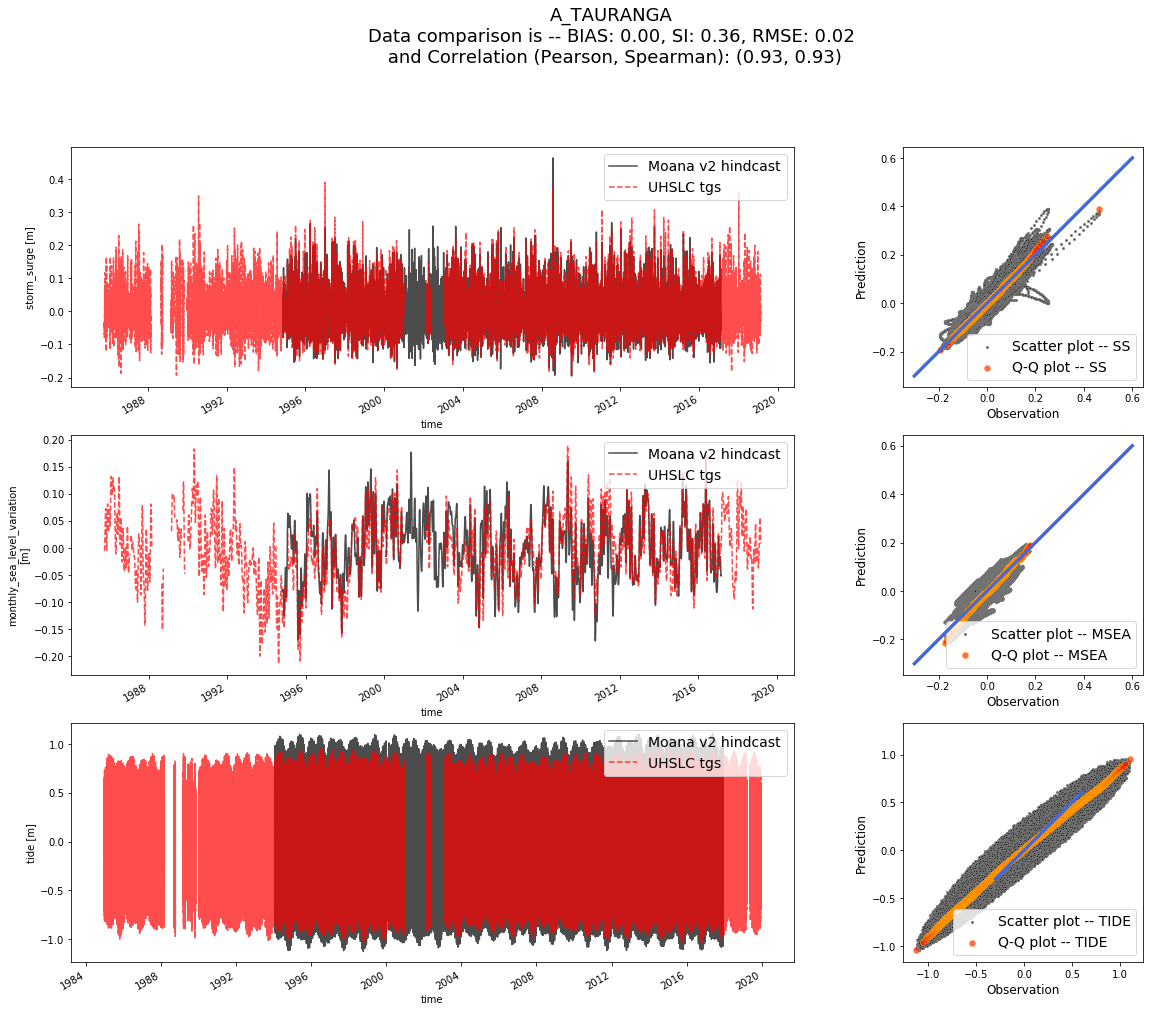

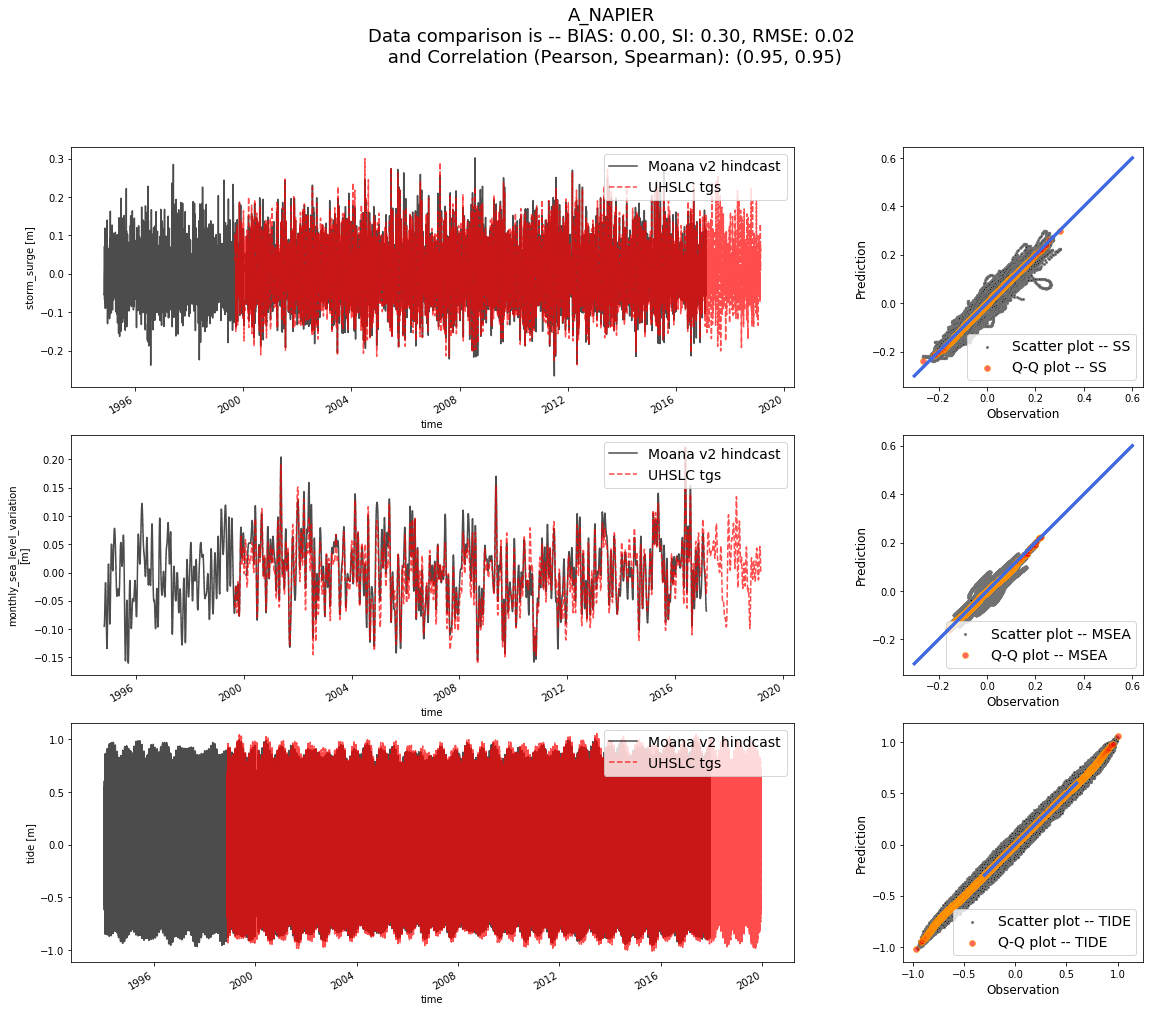

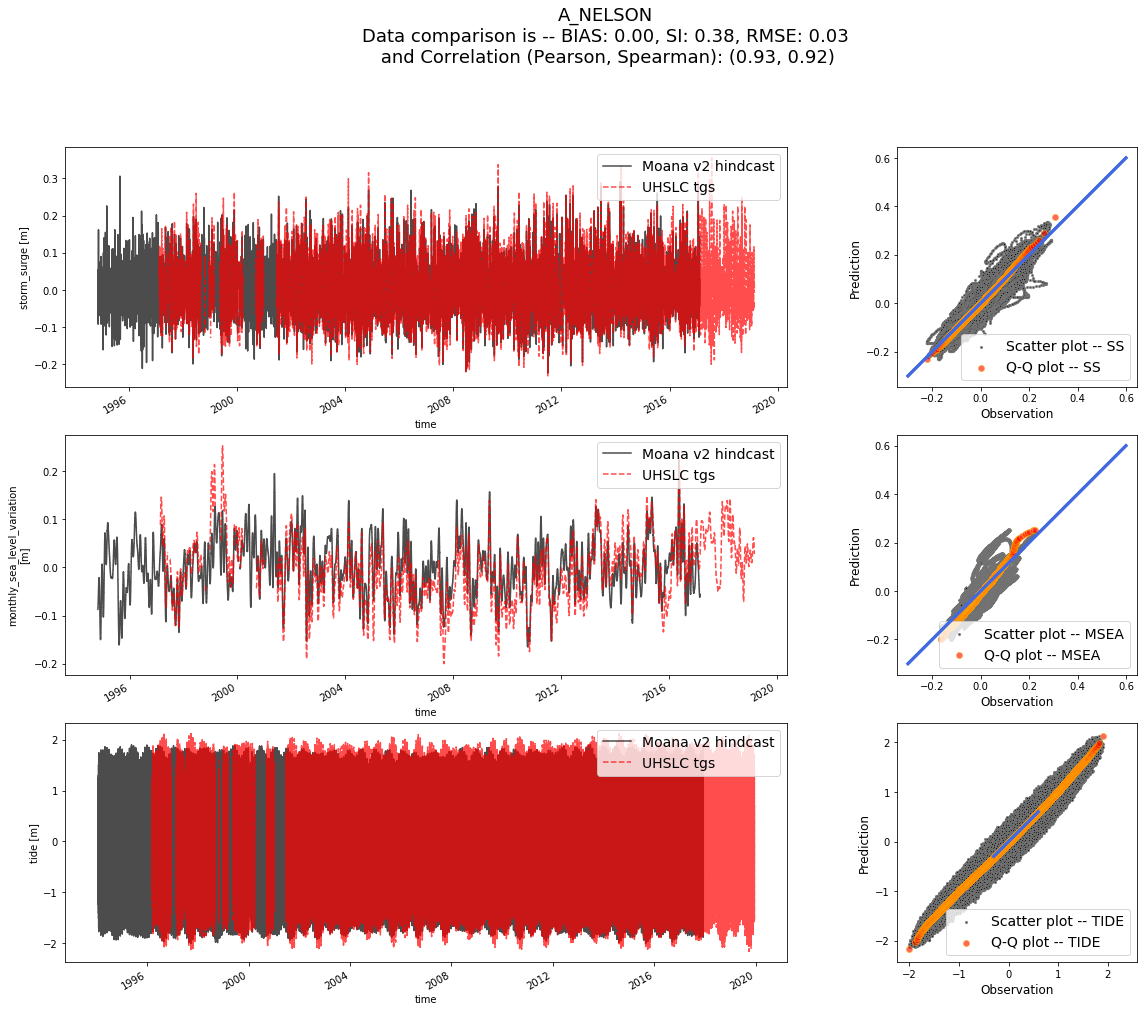

In [4]:
# validate the data
load_cfsr_moana_uhslc.validate_datasets(
    comparison_variables=[['ss','msea','tide'],['ss','msea','tide']]
)

### Moana-UHSLC --- validation statistics

In [5]:
# imports
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# table
moana_uhslc = pd.DataFrame(
    data=np.array(load_cfsr_moana_uhslc.ss_stats),
    columns=['bias','si','rmse','pearson','spearman'],
    index=load_cfsr_moana_uhslc.validator.name.values
)
fig = go.Figure(data=[go.Table(
    header=dict(values=['UHSLC tgs']+list(moana_uhslc.columns),
                fill_color='lightblue',
                align='center',
                font=dict(color='black',size=18)),
    cells=dict(values=moana_uhslc.round(decimals=5).reset_index().T,
               fill_color='lavender',
               align='center',
               font=dict(color='black',size=12)))])
fig.update_layout(title='Comparison between UHSLC and Moana')
fig.show()

## Plot extra data

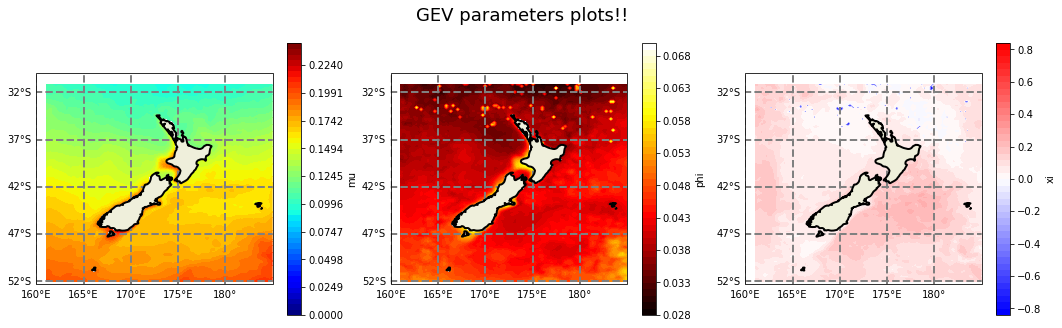

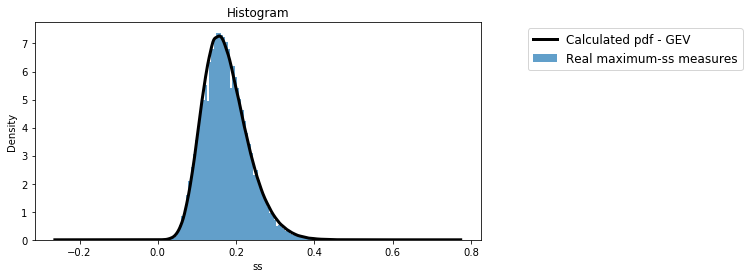

In [6]:
# perform gev analysis over stormsurge data
if os.path.isfile('../data/statistics/stats_ss_gev_moana_monthly.nc'):
    import xarray as xr
    gev_data = xr.open_dataset('../data/statistics/stats_ss_gev_moana_monthly.nc')
    # plot the results loaded
    from sscode.plotting.validation import plot_gev_stats
    plot_gev_stats(gev_data)
else:
    from sscode.statistical import gev_matrix
    gev_data = gev_matrix(
        load_moana_hindcast_ss(daily=True).resample(time='1M').max(),
        'lon','lat',plot=False
    )
    gev_data.to_netcdf('../data/statistics/stats_ss_gev_moana_monthly.nc')


 plotting the projected winds!! 



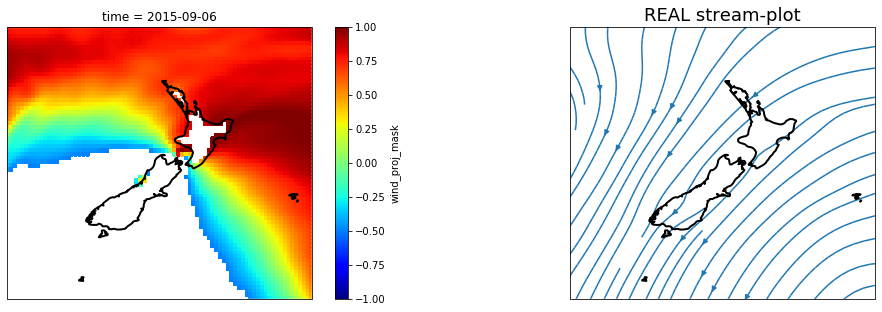

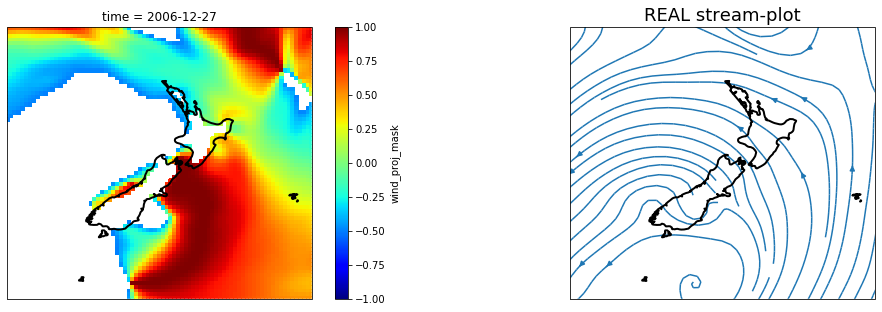


 loading the Moana v2 hindcast data (ss)... 


 plotting the inverse barometer!! 



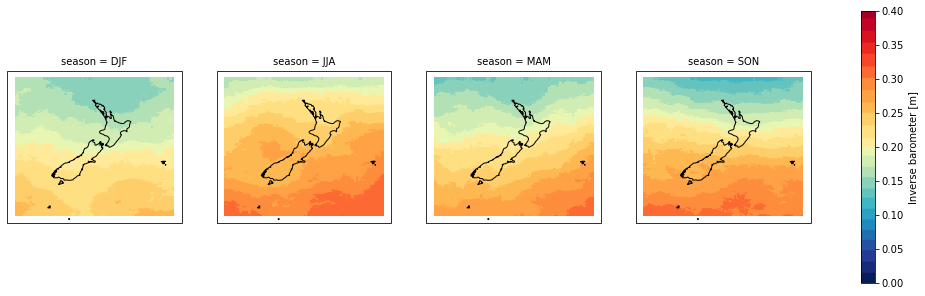

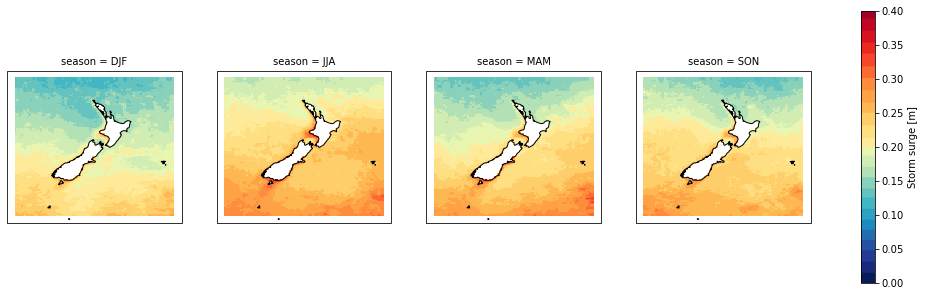

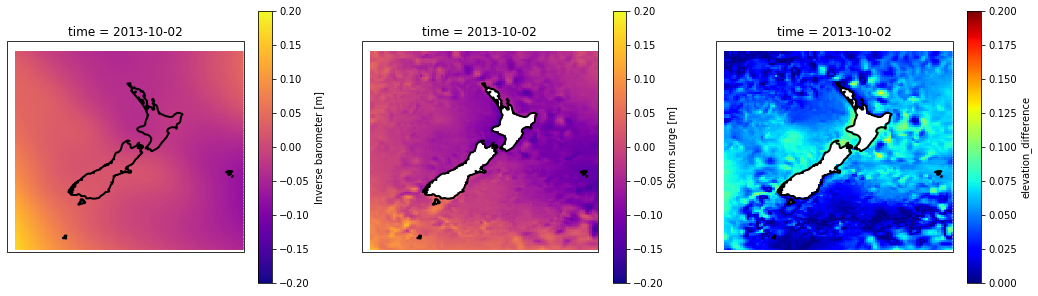

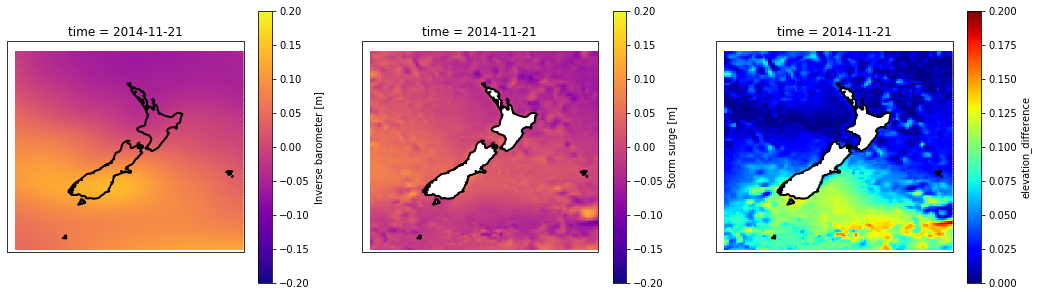

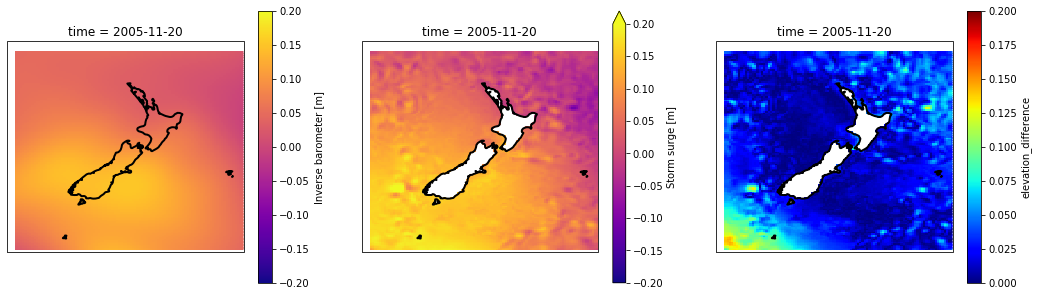

In [8]:
# plot extra data if wanted
plot_extra_data = True
if plot_extra_data:
    from sscode.plotting.data import plot_winds, plot_pres_ibar
    plot_winds(load_cfsr_moana_uhslc.predictor_wind)
    plot_pres_ibar(load_cfsr_moana_uhslc.predictor_slp,
                   load_moana_hindcast_ss(daily=True))